In [20]:
import os
from matplotlib import pyplot as plt
from PIL import Image #Procesamiento Digital de IMágenes
import numpy as np

# 1.Dataset

In [21]:
if not os.path.exists('lfwcrop_grey'):
    !wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
    !unzip 'lfwcrop_grey.zip'

filenames = []
images = []

for filename in os.listdir('lfwcrop_grey/faces'):
    filenames.append(filename)
    image = np.array(Image.open(os.path.join('lfwcrop_grey/faces', filename)))
    images.append(image)

images = np.array(images)

print('Total Number of Faces: {}'.format(len(images)))
print(images.shape)
n = 64*64 #dimensión de mis datos (original) n = 4096 features
X = images.reshape(13233, n) # m = 13233 ejemplos de entrenamiento
print(X.shape)


Total Number of Faces: 13233
(13233, 64, 64)
(13233, 4096)


# 2.Visualización del Dataset

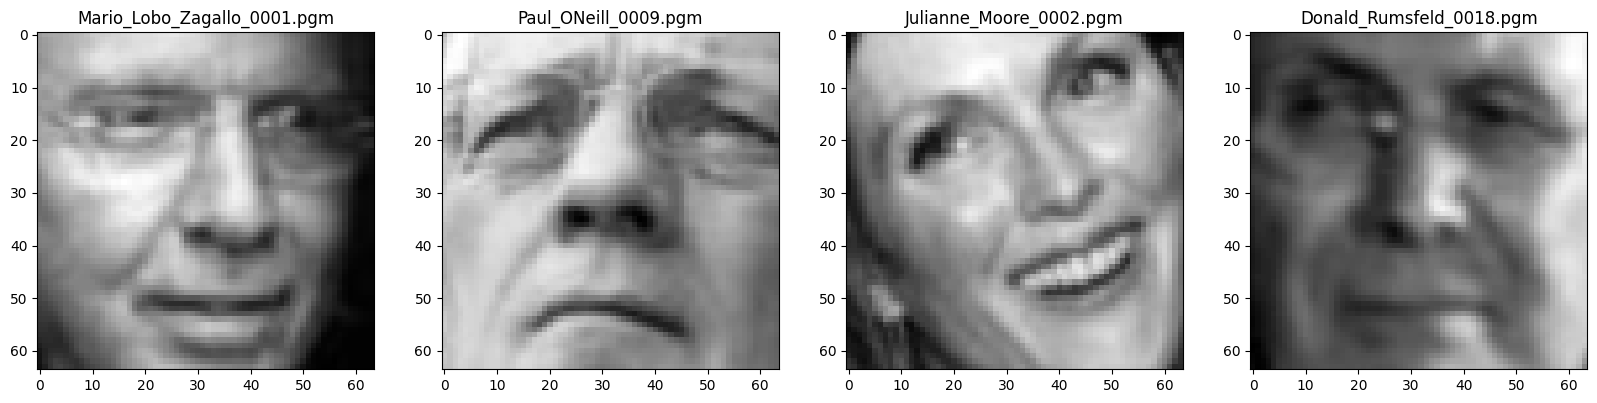

In [7]:
plt.figure(figsize=(20, 10))
num_images = 4
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images)))
    image = images[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

# 3.Compresión de imágenes de rostros con PCA

In [8]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
explained_variance = 0.95 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 95% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos
#fit solo para el entrenamiento. Esto lo que hace es crear el espacio vectorial, los eigen vectors, solo los crea. Hace el fit, ajusta, encuentra los eigen vectors.
#Si quiero proyectar mi rostro ahi, lo que tenemos que hacer tomar una foto, transformarle a 64x64, el mismo formato pgm y despues (no tenemos que hacer fit a nuestra foto)

PCA(n_components=0.95)

In [9]:
z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). Hace la proyeccion, proyecta.
#En algebra lineal Ureduce o U son matrices de rotación
#llamamos componentes principales a los vectores, por eso aqui llamamos componentes_
#el .T es por la transpuesta
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 180)
El número de componentes principales K es 180  que retienen el  95.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 180)
PCA consigue reducir el tamaño en disco al  4.39453125 % de su tam. original


# 4.Visualizando los eigenvectors (Ureduce-> EigenFaces)

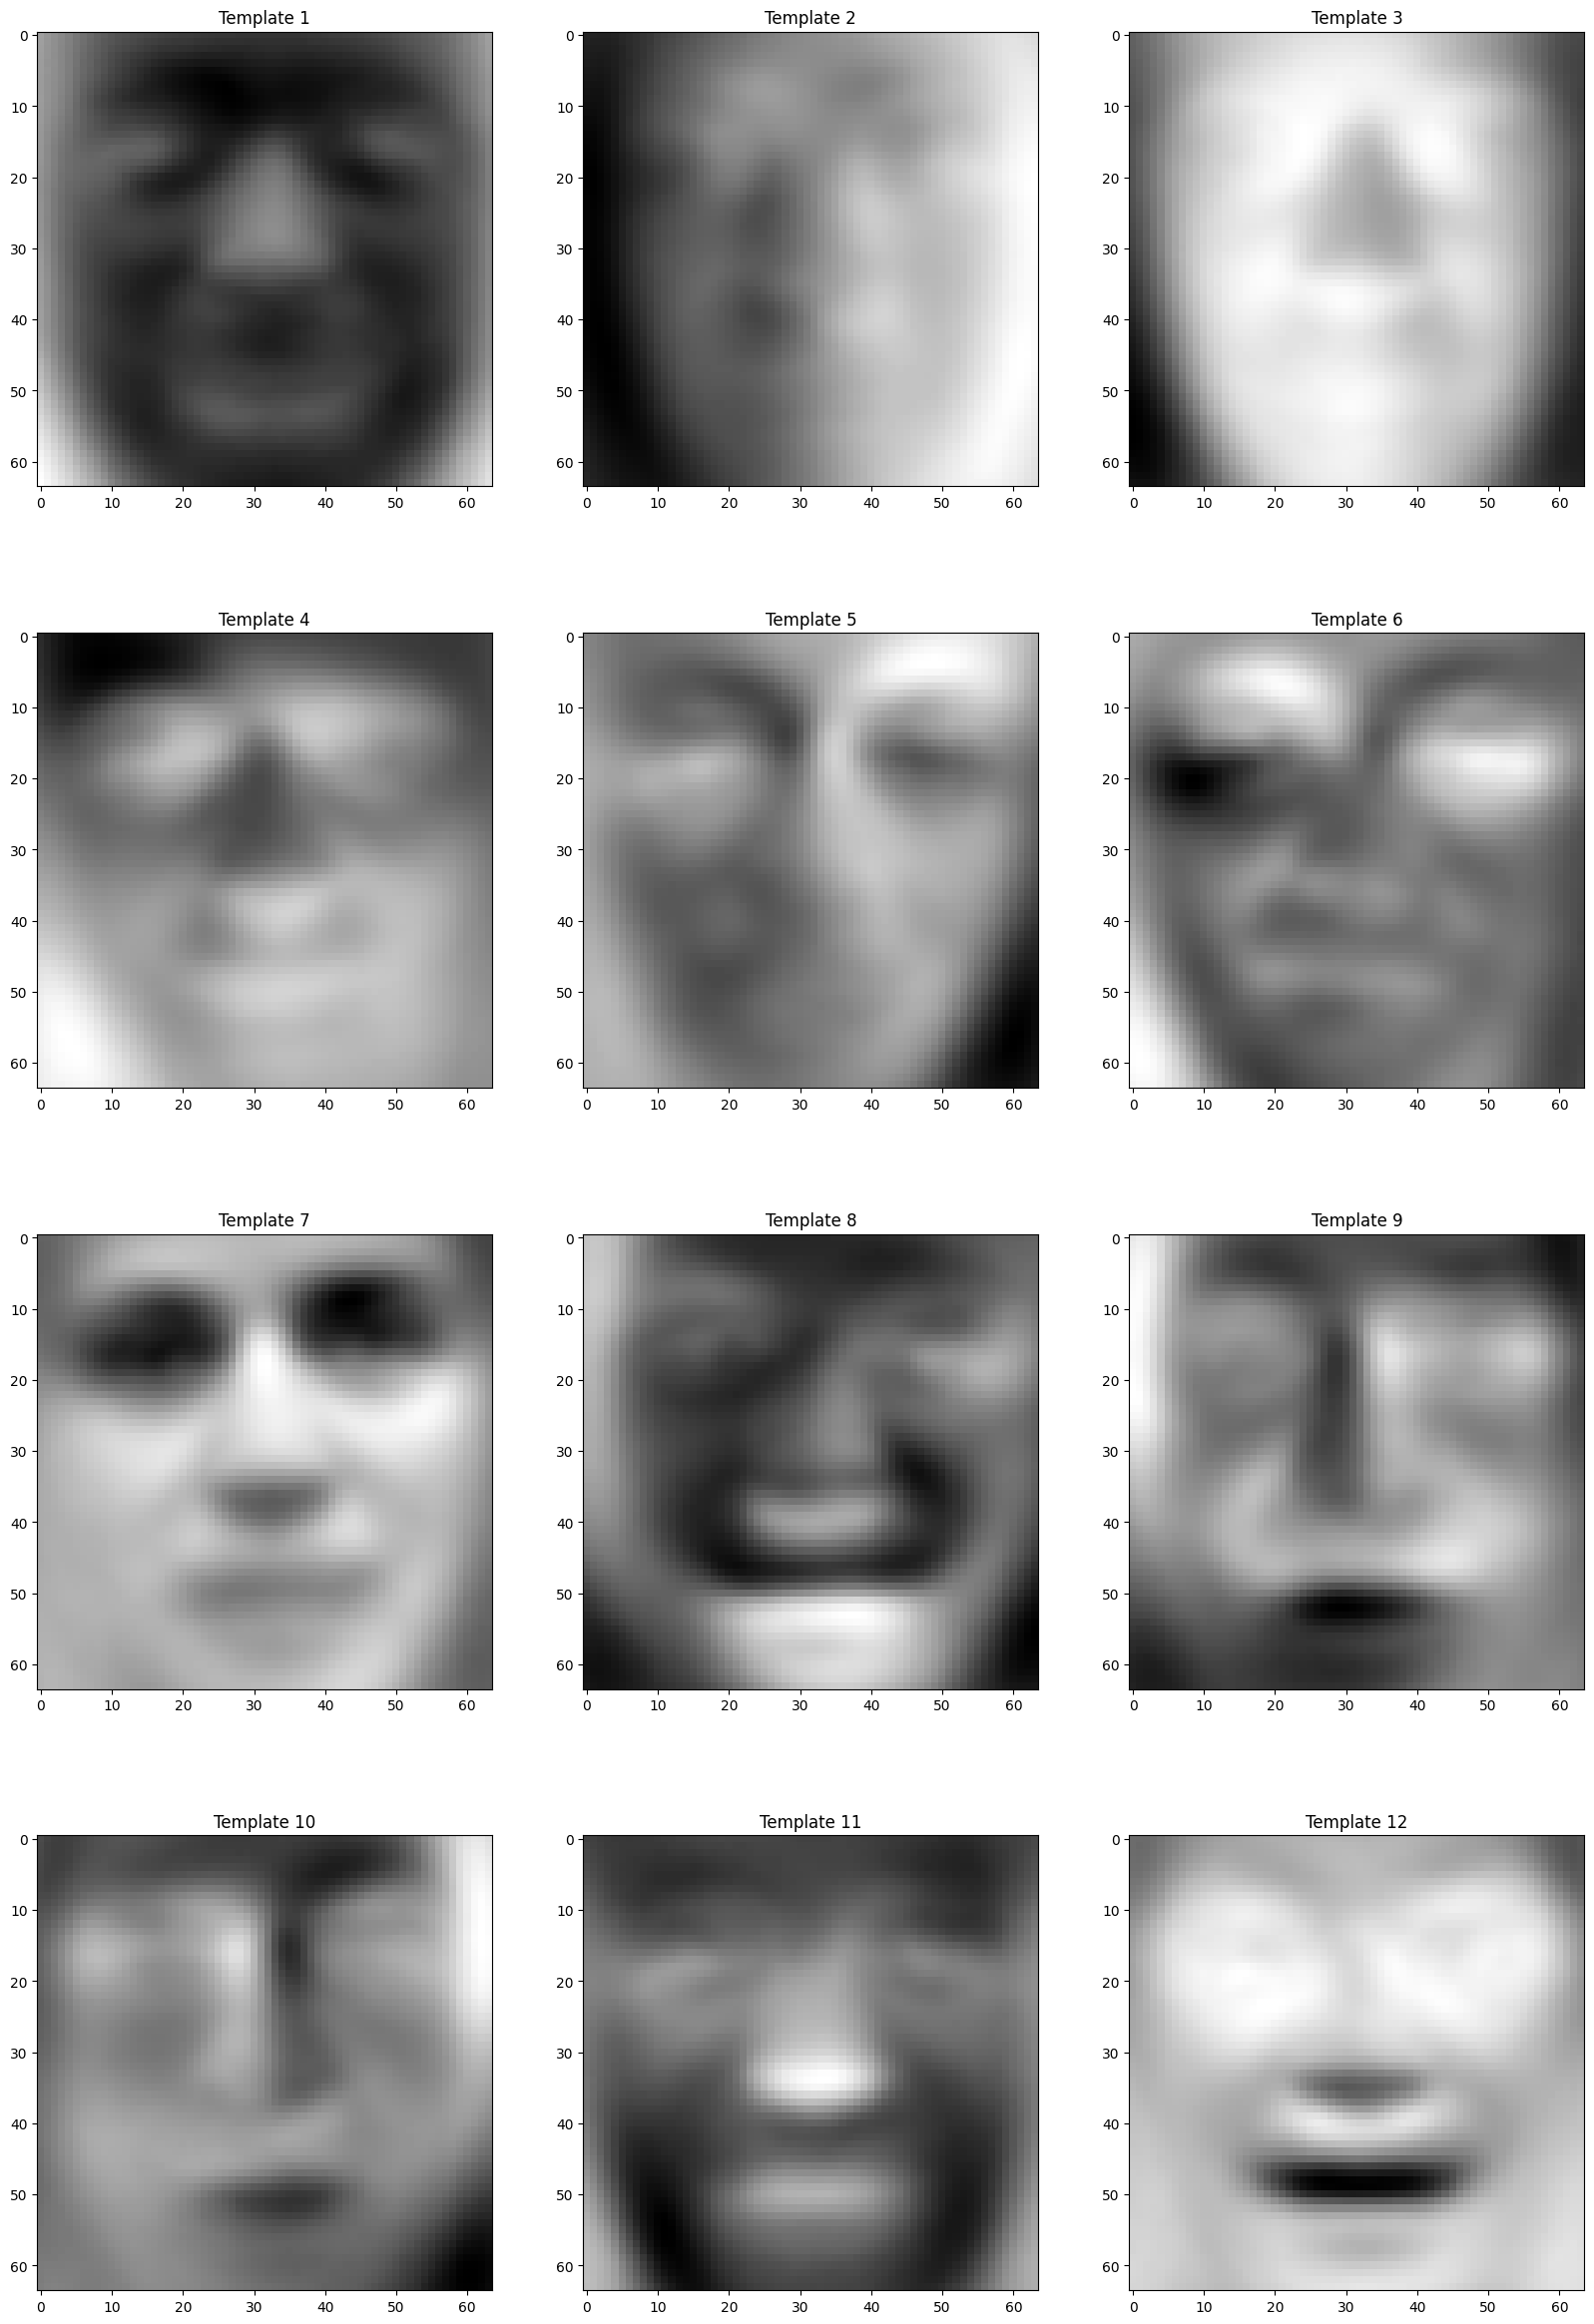

In [10]:
EigenFaces = Ureduce.reshape(64, 64, K) #Eigenfaces = Eigen + Faces.  Eigenvector = vector propio (forman un espacio vectorial)
#a los vectores base es posible verlos como imagenes
#cuando antes los vectores base eran los ejes, ahora los vectores base son "imagenes", porque estamos trabajando con imagenes

plt.figure(figsize=(20, 30))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(EigenFaces[:,:,i], 'gray')
    plt.title('Template {}'.format(i+1))

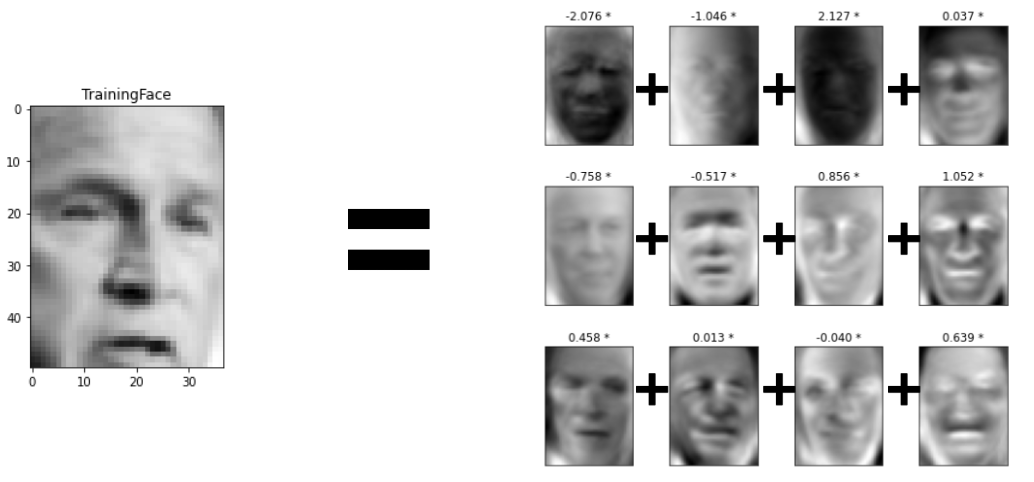

# 5.Reconstrucción de imagenes de rostros

Label Ariel_Sharon_0034.pgm


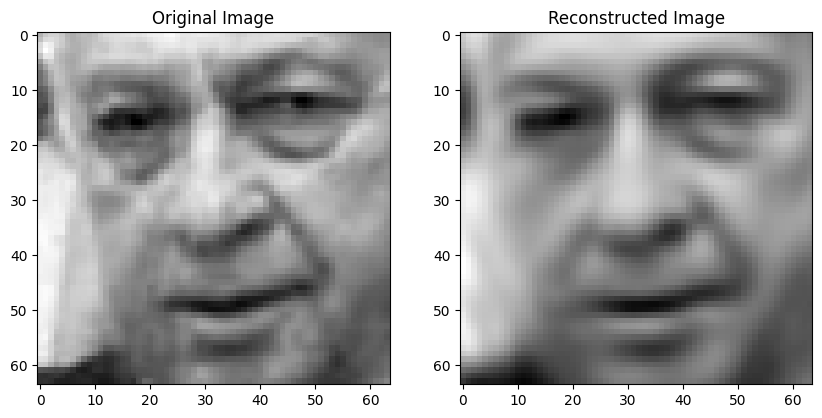

In [16]:
import random
random.seed(a=870)

#Implementa x_approx = Ureduce*z
X_approx = pca.inverse_transform(z) #transformada KL

# índice de la imagen a graficar
index = random.randint(0,13233)
reconstructed_image = X_approx[index]
reconstructed_image = reconstructed_image.reshape(64, 64)

print('Label {}'.format(filenames[index]))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(images[index], 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, 'gray')

# 6.Actividades 
Todas las actividades tienen el mismo puntaje

## 6.1 Varianza retenida vs número de componentes & 6.2 Compresión y calidad de la imagen

* Grafique la varianza retenida en función del número de componentes principales retenidos k. Para esto, modifique la variable `explained_variance` con los siguientes valores: 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7. Para cada valor, verifique el número de componentes principales retenidos k.

* Grafique el porcentaje de compresión dado por k/n en función del número de componentes retenidos k. Para esto, modifique la variable `explained_variance` con los siguientes valores: 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7.  Para cada valor, verifique el número de componentes principales retenidos k.

* Por otro lado, para cada valor de k, grafique un rostro para ver la pérdida de calidad a medida que el número de componentes k disminuye.

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 577)
El número de componentes principales K es 577  que retienen el  99.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 577)
PCA consigue reducir el tamaño en disco al  14.0869140625 % de su tam. original
Label Kim_Jong-Il_0002.pgm
-----------------------------------------------------------------------------
Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 180)
El número de componentes principales K es 180  que retienen el  95.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 180)
PCA consigue reducir el tamaño en disco al  4.39453125 % de su tam. original
Label Kim_Jong-Il_0002.pgm
-----------------------------------------------------------------------------
Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 87)
El número de componentes princip

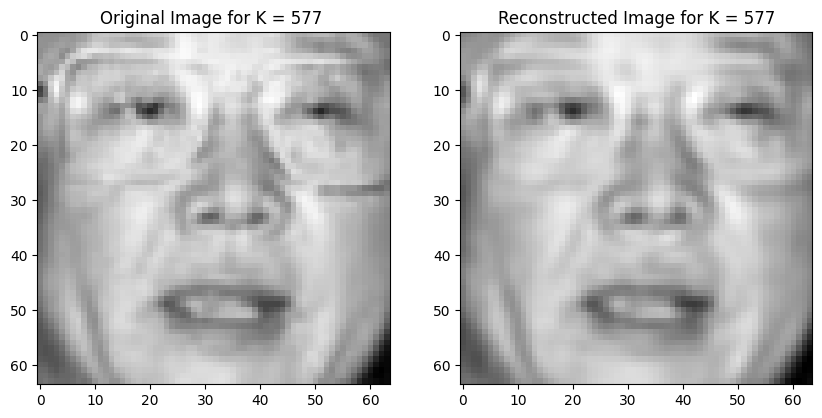

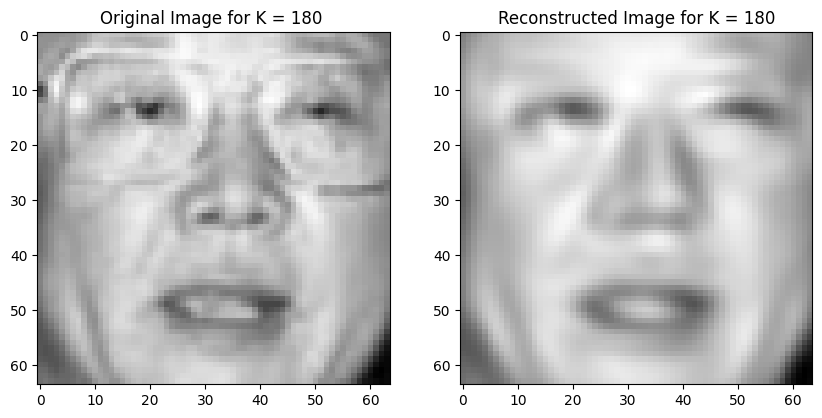

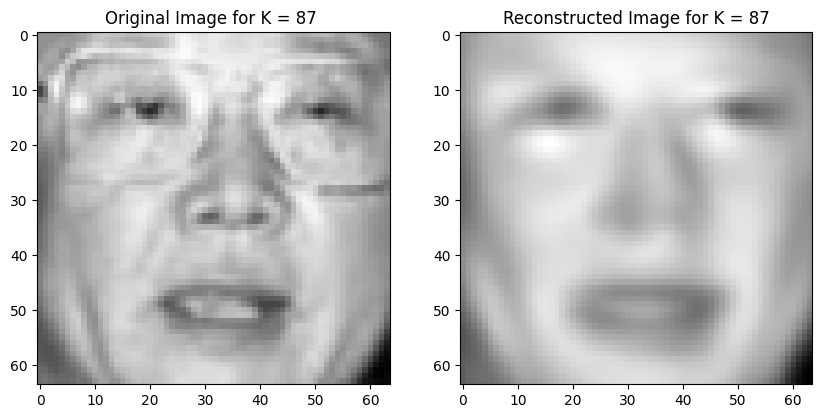

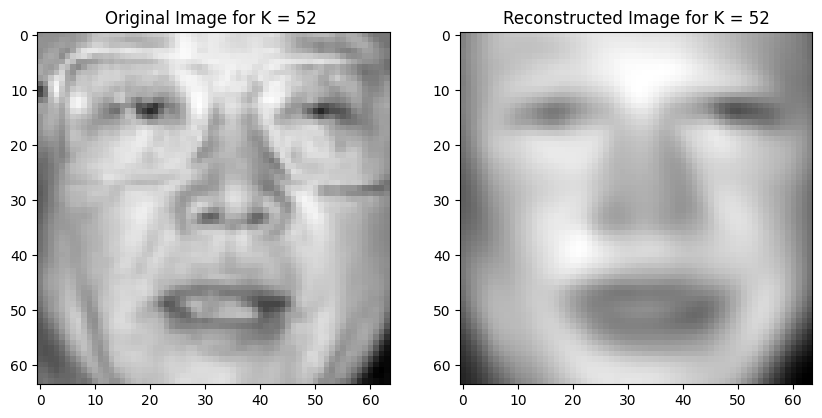

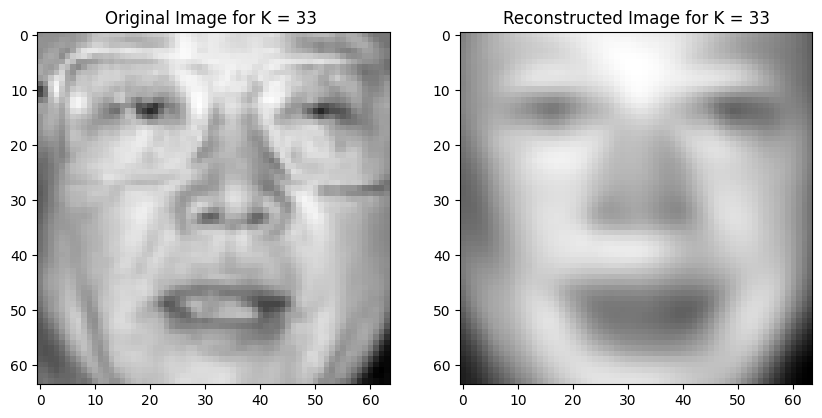

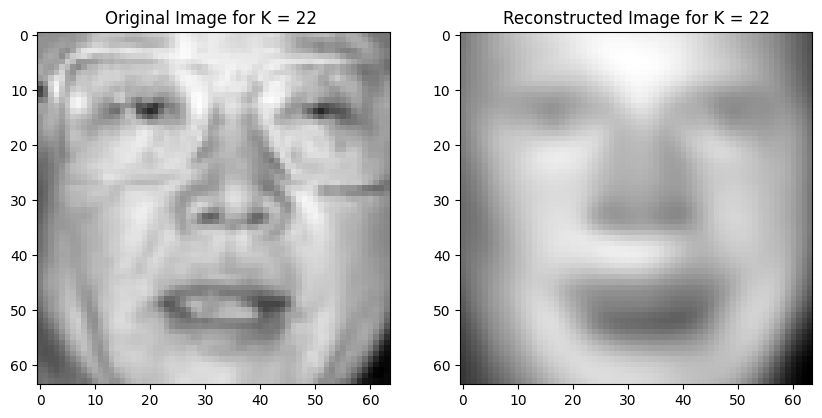

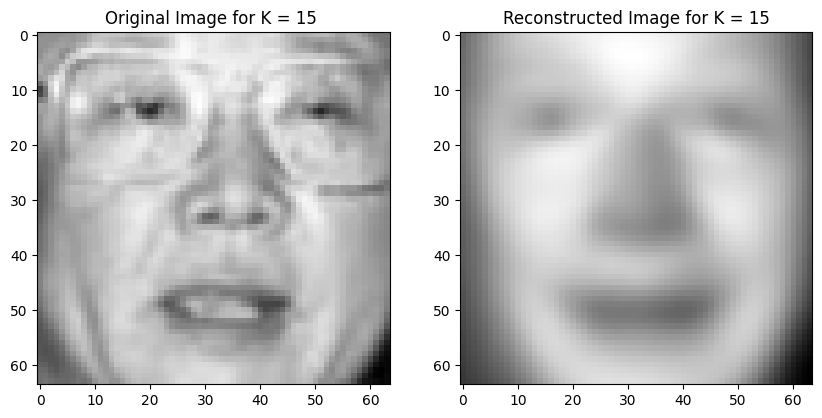

In [7]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
#import random

#random.seed(a=860)

explained_variance = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7] #varianza retenida =  varianza explicada = "información" retenida
for i in explained_variance:
  pca = PCA(i)
  pca.fit(X)

  z = pca.transform(X)

  Ureduce = pca.components_.T #Ureduce nxk
  K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
  print("Los datos originales tienen dimensión", X.shape)
  print("Los datos comprimidos tienen dimensión", z.shape)
  print("El número de componentes principales K es", K, " que retienen el ", i*100, "% de la varianza")
  print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
  print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")



  #Implementa x_approx = Ureduce*z
  X_approx = pca.inverse_transform(z) #transformada KL

  # índice de la imagen a graficar
  index = 26
  reconstructed_image = X_approx[index]
  reconstructed_image = reconstructed_image.reshape(64, 64)

  print('Label {}'.format(filenames[index]))
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title('Original Image for K = %i ' %K)
  plt.imshow(images[index], 'gray')

  plt.subplot(1, 2, 2)
  plt.title('Reconstructed Image for K = %i' %K)
  plt.imshow(reconstructed_image, 'gray')


  print("-----------------------------------------------------------------------------")

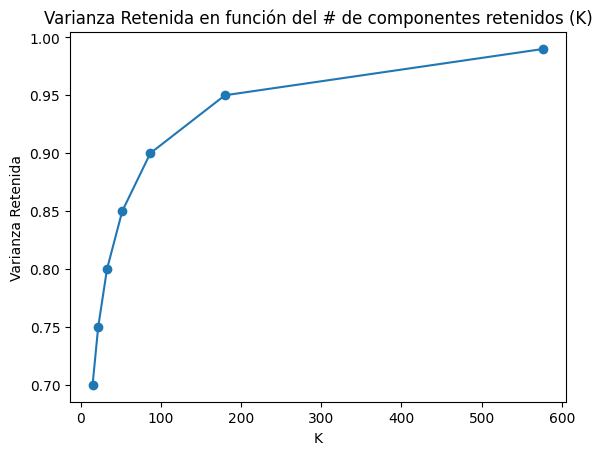

In [8]:
import matplotlib.pyplot as plt

e_v = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7]
k = [577, 180, 87, 52, 33, 22, 15]

plt.plot(k, e_v, '-o')
plt.xlabel('K')
plt.ylabel('Varianza Retenida')
plt.title('Varianza Retenida en función del # de componentes retenidos (K)')
plt.show()

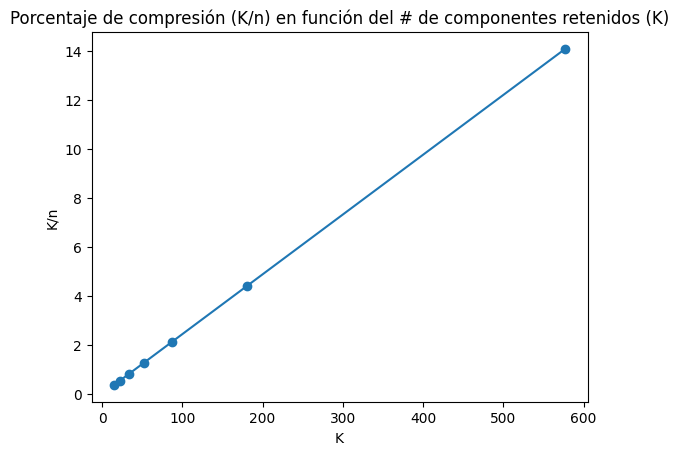

In [9]:
k_n = [14.0869, 4.3945, 2.1240, 1.2695, 0.8057, 0.5371, 0.3662]

plt.plot(k, k_n, '-o')
plt.xlabel('K')
plt.ylabel('K/n')
plt.title('Porcentaje de compresión (K/n) en función del # de componentes retenidos (K)')
plt.show()

## 6.3 Proyectar mi rostro en los Eigenfaces

Tomar una imagen suya y "proyectarla" (transformarla) en los Eigenfaces. Recuerde que su rostro debe estar escalada a 64x64 pixeles y en formato pgm. No se olvide de realizar el reshape a 4096. Luego, reconstruir su imagen y graficar la original junto con la reconstruida. Para este apartado, retener 99% de la varianza

In [22]:
n_image = np.array(Image.open('/content/cropped-2.pgm'))

print(n_image.shape)
n = 64*64 #dimensión de mis datos (original) n = 4096 features
y = n_image.reshape(1, n) # m = 13233 ejemplos de entrenamiento
print(y.shape)

(64, 64)
(1, 4096)


Text(0.5, 1.0, 'Selfie')

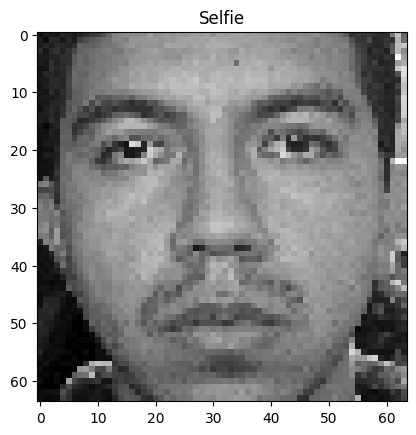

In [23]:
plt.imshow(n_image, 'gray')
plt.title('Selfie')

In [24]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
explained_variance = 0.99 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X)

PCA(n_components=0.99)

La foto original tiene dimensión (1, 4096)
La foto comprimida tiene dimensión (1, 577)
El número de componentes principales K es 577  que retienen el  99.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 577)
PCA consigue reducir el tamaño en disco al  14.0869140625 % de su tam. original


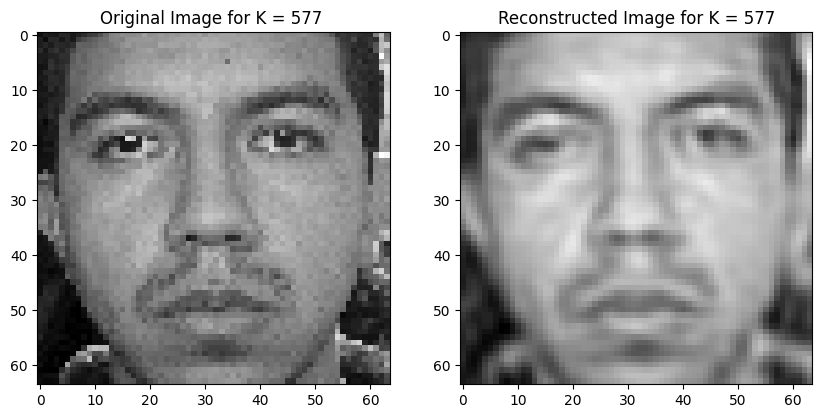

In [25]:
z = pca.transform(y)

Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("La foto original tiene dimensión", y.shape)
print("La foto comprimida tiene dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")



#Implementa x_approx = Ureduce*z
y_approx = pca.inverse_transform(z) #transformada KL

#imagen a graficar
reconstructed_image_y = y_approx
reconstructed_image_y = reconstructed_image_y.reshape(64, 64)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image for K = %i ' %K)
plt.imshow(n_image, 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image for K = %i' %K)
plt.imshow(reconstructed_image_y, 'gray')

## 6.4 Conclusiones

* A medida que el valor de componentes principales K aumenta, la varianza retenida aumenta también. Tras los resultados obtenidos en las actividades 6.1 y 6.2, la relación no se considera lineal, sino presumiblemente logarítmica. Traducido a palabras, la información que será retenida será mayor para el caso en que las componentes principales K aumenten.

* A medida que el valor de componentes principales K aumenta, el porcentaje de compresión (K/n) aumenta también. En este caso, la relación si es lineal.

* Resulta sencillo proyectar una imagen extra, en este caso una selfie, en los Eigenface de un espacio previamente creado (resultado que se obtiene de hacer el pca.fit en el conjunto de entrenamiento).